In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [57]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
pd.set_option('display.max_rows',None)

In [58]:
stroke.shape

(5110, 12)

<AxesSubplot:xlabel='gender', ylabel='bmi'>

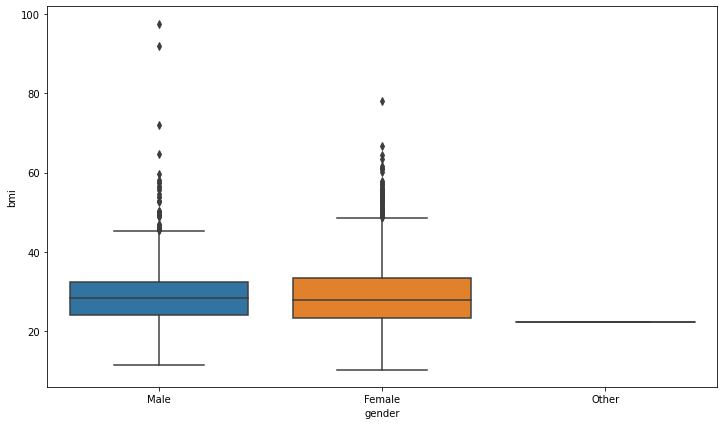

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='gender',y='bmi',data=stroke)
#not a good reference to determine the bmi

In [60]:
stroke.age.round(decimals=0)

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
5       81.0
6       74.0
7       69.0
8       59.0
9       78.0
10      81.0
11      61.0
12      54.0
13      78.0
14      79.0
15      50.0
16      64.0
17      75.0
18      60.0
19      57.0
20      71.0
21      52.0
22      79.0
23      82.0
24      71.0
25      80.0
26      65.0
27      58.0
28      69.0
29      59.0
30      57.0
31      42.0
32      82.0
33      80.0
34      48.0
35      82.0
36      74.0
37      72.0
38      58.0
39      49.0
40      78.0
41      54.0
42      82.0
43      63.0
44      60.0
45      76.0
46      75.0
47      58.0
48      81.0
49      39.0
50      76.0
51      78.0
52      79.0
53      77.0
54      63.0
55      63.0
56      82.0
57      78.0
58      73.0
59      54.0
60      56.0
61      80.0
62      67.0
63      45.0
64      75.0
65      78.0
66      70.0
67      76.0
68      59.0
69      80.0
70      76.0
71      67.0
72      66.0
73      63.0
74      52.0
75      80.0
76      80.0

In [61]:
stroke['age'] = stroke['age'].astype('int')

In [62]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='bmi'>

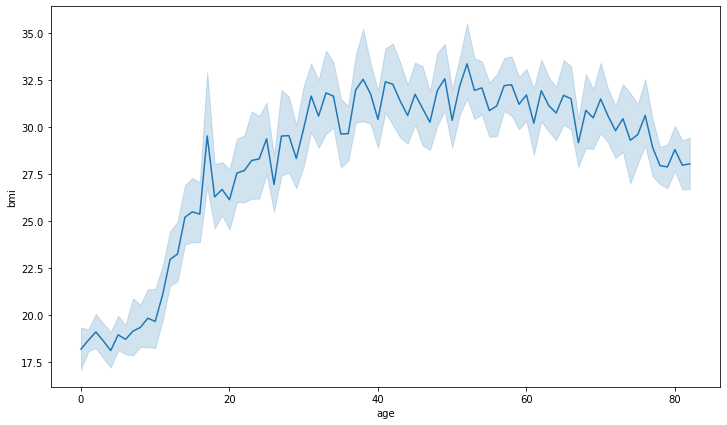

In [63]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='age',y='bmi',data=stroke)
    

In [64]:
def age_bmi_category(cols):
    age=cols[0]
    if age<=15:
        return 1
    elif age>15 and age<=25:
        return 2
    elif age>25 and age<=40:
        return 3 
    elif age>40 and age<=60:
        return 4
    elif age>60:
        return 5
stroke['age_bmi_category'] = stroke[['age']].apply(age_bmi_category,axis=1)

In [65]:
stroke.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi_category
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,5
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,5
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,5
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,5
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,5
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,4
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,5


<AxesSubplot:xlabel='age_bmi_category', ylabel='bmi'>

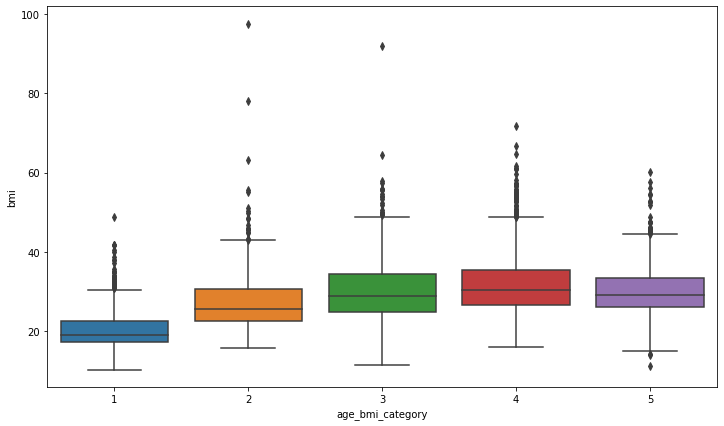

In [66]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='age_bmi_category',y='bmi',data=stroke)

In [67]:
stroke[['bmi','age_bmi_category']].groupby('age_bmi_category').mean()

,bmi
age_bmi_category,
1,20.467675
2,27.527747
3,30.502826
4,31.668435
5,29.873377


In [68]:
def impute_bmi(cols):
    bmi = cols[0]
    age_bmi_category=cols[1]
    if pd.isnull(bmi):
        if age_bmi_category == 1:
            return 20
        elif age_bmi_category == 2:
            return 27
        elif age_bmi_category == 3:
            return 31
        elif age_bmi_category == 4:
            return 32
        else:
            return 30
    else:
        return bmi
stroke['bmi'] = stroke[['bmi','age_bmi_category']].apply(impute_bmi,axis=1)

In [69]:
stroke.drop('id',axis=1,inplace=True)

In [70]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi_category
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1,5
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,5
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5


In [71]:
stroke.shape

(5110, 12)

In [72]:
stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [73]:
stroke['smoking_status'].replace('Unknown','missing',inplace=True)

In [74]:
stroke.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi_category
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1,5
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,5
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,5
6,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,5
7,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,5
8,Female,59,0,0,Yes,Private,Rural,76.15,32.0,missing,1,4
9,Female,78,0,0,Yes,Private,Urban,58.57,24.2,missing,1,5


In [75]:
stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [76]:
stroke.drop('age_bmi_category',axis=1,inplace=True)

In [77]:
sex = pd.get_dummies(stroke['gender'],drop_first=True)
married = pd.get_dummies(stroke['ever_married'],drop_first=True)
residence = pd.get_dummies(stroke['Residence_type'],drop_first=True)
smoke_status = pd.get_dummies(stroke['smoking_status'],drop_first=True)
work_type = pd.get_dummies(stroke['work_type'],drop_first=True)

In [78]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [79]:
stroke.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1,inplace=True)

In [80]:
stroke = pd.concat([stroke,sex,married,residence,smoke_status,work_type],axis=1)

In [81]:
stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Yes,Urban,missing,never smoked,smokes,Never_worked,Private,Self-employed,children
0,67,0,1,228.69,36.6,1,1,0,1,1,0,0,0,0,1,0,0
1,61,0,0,202.21,30.0,1,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,1,0,0
3,49,0,0,171.23,34.4,1,0,0,1,1,0,0,1,0,1,0,0
4,79,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(stroke[['age','avg_glucose_level','bmi']])

MinMaxScaler()

In [83]:
scaled_features= pd.DataFrame(scaler.transform(stroke[['age','avg_glucose_level','bmi']]), columns =['age_sca','avg_glucose_level_sca','bmi_sca'])

In [84]:
stroke.drop(columns=['age','avg_glucose_level','bmi'],inplace=True)

In [85]:
stroke.head()

,hypertension,heart_disease,stroke,Male,Other,Yes,Urban,missing,never smoked,smokes,Never_worked,Private,Self-employed,children
0,0,1,1,1,0,1,1,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,0,1,1,1,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,1,0,0,1,0,1,0,0
4,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [86]:
stroke = pd.concat([stroke,scaled_features],axis=1)

In [87]:
stroke.head()

,hypertension,heart_disease,stroke,Male,Other,Yes,Urban,missing,never smoked,smokes,Never_worked,Private,Self-employed,children,age_sca,avg_glucose_level_sca,bmi_sca
0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0.817073,0.801265,0.301260
1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0.743902,0.679023,0.225659
2,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0.975610,0.234512,0.254296
3,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0.597561,0.536008,0.276060
4,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0.963415,0.549349,0.156930


In [88]:
stroke_copy = stroke.copy()

In [89]:
y = stroke_copy.pop('stroke')
X = stroke_copy

In [94]:
X.columns

Index(['hypertension', 'heart_disease', 'Male', 'Other', 'Yes', 'Urban',
       'missing', 'never smoked', 'smokes', 'Never_worked', 'Private',
       'Self-employed', 'children', 'age_sca', 'avg_glucose_level_sca',
       'bmi_sca'],
      dtype='object')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [126]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(0.7)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)

C:\Users\al\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [127]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek(0.7)
X_train_smot, y_train_smot = smot.fit_sample(X_train, y_train) 

C:\Users\al\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [129]:
model_1_1 = XGBClassifier(n_estimators = 500, random_state=0,learning_rate=0.5)
model_1_1.fit(X_train_ros, y_train_ros)
pred_1_1 = model_1_1.predict(X_test)

[19:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
print(classification_report(y_test,pred_1_1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1457
           1       0.25      0.11      0.15        76

    accuracy                           0.94      1533
   macro avg       0.60      0.54      0.56      1533
weighted avg       0.92      0.94      0.93      1533



In [131]:
model_1_2 = XGBClassifier(n_estimators = 500, random_state=0,learning_rate=0.5)
model_1_2.fit(X_train_smot, y_train_smot)
pred_1_2 = model_1_2.predict(X_test)

[19:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [132]:
print(classification_report(y_test,pred_1_2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1457
           1       0.21      0.14      0.17        76

    accuracy                           0.93      1533
   macro avg       0.58      0.56      0.57      1533
weighted avg       0.92      0.93      0.92      1533



In [133]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train_ros,y_train_ros)
pred_2 = model_2.predict(X_test)

In [134]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1457
           1       0.14      0.59      0.23        76

    accuracy                           0.80      1533
   macro avg       0.56      0.70      0.56      1533
weighted avg       0.93      0.80      0.86      1533



In [135]:
model_3 = LogisticRegression()
model_3.fit(X_train_ros,y_train_ros)
pred_3 = model_3.predict(X_test)

In [136]:
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1457
           1       0.15      0.68      0.25        76

    accuracy                           0.80      1533
   macro avg       0.57      0.74      0.57      1533
weighted avg       0.94      0.80      0.85      1533



In [137]:
model_4= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_4.fit(X_train_ros,y_train_ros)
pred_4 = model_4.predict(X_test)

In [138]:
print(classification_report(y_test,pred_4))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1457
           1       0.15      0.74      0.25        76

    accuracy                           0.77      1533
   macro avg       0.56      0.76      0.56      1533
weighted avg       0.94      0.77      0.84      1533



In [113]:
X.head()

,hypertension,heart_disease,Male,Other,Yes,Urban,missing,never smoked,smokes,Never_worked,Private,Self-employed,children,age_sca,avg_glucose_level_sca,bmi_sca
0,0,1,1,0,1,1,0,0,0,0,1,0,0,0.817073,0.801265,0.301260
1,0,0,0,0,1,0,0,1,0,0,0,1,0,0.743902,0.679023,0.225659
2,0,1,1,0,1,0,0,1,0,0,1,0,0,0.975610,0.234512,0.254296
3,0,0,0,0,1,1,0,0,1,0,1,0,0,0.597561,0.536008,0.276060
4,1,0,0,0,1,0,0,1,0,0,0,1,0,0.963415,0.549349,0.156930


In [ ]:
# Random Forest Classifier Model gave the best classification report since this should focus on the recall because we need to
# reduce the error in assessing people with stroke, but the prediction tells the person has no stroke.  